In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

datapoints = pd.read_json("Results.json")
datapoints[:10]

,relaxTime,totalTime,gflop/s,matrixSize,iterations,numCores,sched,size
0,"[0.040417, 0.040434, 0.037306]","[0.044052, 0.044139, 0.0413]","[3.95873, 3.957083, 4.28885]",800,50,0,N/A,4.882812
1,"[0.594795, 0.602903, 0.601053]","[0.653902, 0.6610900000000001, 0.659022]","[4.304007, 4.246125, 4.259195]",3200,50,0,N/A,78.125000
2,"[2.5006079999999997, 2.484903, 2.485986]","[2.72833, 2.712494, 2.713971]","[4.095005, 4.120885, 4.11909]",6400,50,0,N/A,312.500000
3,"[9.380755, 9.431165, 9.394363]","[10.263638, 10.33069, 10.270808]","[4.366386, 4.343048, 4.360061]",12800,50,0,N/A,1250.000000
4,"[38.985199, 38.52856, 38.891919]","[42.462547, 41.978895, 42.348863]","[4.202621, 4.25243, 4.2127]",25600,50,0,N/A,5000.000000
5,"[0.032095, 0.029366, 0.02917]","[0.034435, 0.031659, 0.031294999999999996]","[4.985249, 5.448484, 5.485158]",800,50,2,dynamic,4.882812
6,"[0.021398, 0.019122, 0.019978]","[0.023703, 0.021275, 0.022525]","[7.477341, 8.367419, 8.008616]",800,50,2,guided,4.882812
7,"[0.020169, 0.021224, 0.021727999999999997]","[0.022515999999999998, 0.023374, 0.024117]","[7.932956, 7.538807, 7.363725]",800,50,2,static,4.882812
8,"[0.37385399999999996, 0.377446, 0.380928999999...","[0.406055, 0.409375, 0.414054]","[6.847586, 6.782432, 6.720421]",3200,50,2,dynamic,78.125000
9,"[0.332474, 0.34882, 0.329189]","[0.364981, 0.380606, 0.361998]","[7.699855, 7.339034, 7.776682]",3200,50,2,guided,78.125000


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


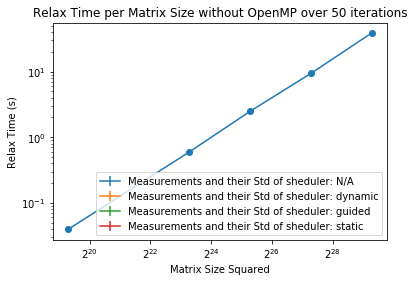

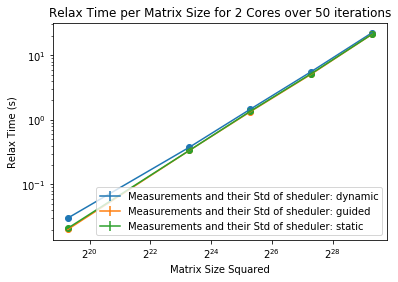

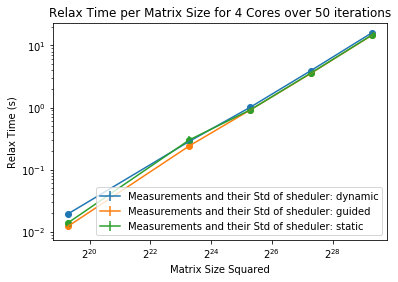

In [139]:
def generateGraphs(datapoints, graphName):
    data = pd.DataFrame(datapoints)
    #Total Time Averages and standard deviation
    total_time = np.array([i for i in data['totalTime']])
    average_total_time = np.average(total_time, axis = 1)
    std_total_time = np.std(total_time, axis = 1)/np.sqrt(np.shape(total_time)[1])
    data['averageTotalTime'] = average_total_time
    data['stdTotalTime'] = std_total_time
    
    #relaxTime Averages and standard deviation
    relax_time = np.array([i for i in data['relaxTime']])
    average_relax_time = np.average(relax_time, axis = 1)
    std_relax_time = np.std(relax_time, axis = 1)/np.sqrt(np.shape(relax_time)[1])
    data['averageRelaxTime'] = average_relax_time
    data['stdRelaxTime'] = std_relax_time
    
    #relaxTime Averages and standard deviation
    gflops = np.array([i for i in data['gflop/s']])
    average_gflops = np.average(gflops, axis = 1)
    std_gflops = np.std(gflops, axis = 1)/np.sqrt(np.shape(gflops)[1])
    data['averageGFLOP/s'] = average_gflops
    data['stdGFLOP/s'] = std_gflops
    
    #Create Plots of various results
    if graphName == 'matrixSize': 
        for core_count in data.numCores.unique():
            for it in data.iterations.unique():
                plt.figure()
                data0 = data[data['numCores'] == core_count]
                data0 = data0[data0['iterations'] == it]
                data0 = data0.sort_values('matrixSize')
                for i in data.sched.unique():
                    if (core_count == 0 and i == 'N/A') or i != 'N/A':
                        data1 = data0[data['sched'] == i]
                        plt.errorbar(data1['matrixSize']**2, data1['averageRelaxTime'], yerr = data1['stdRelaxTime'], label = f'Measurements and their Std of sheduler: {i}')
                        plt.scatter(data1['matrixSize']**2, data1['averageRelaxTime'])
                plt.xlabel('Matrix Size Squared')
                plt.ylabel('Relax Time (s)')
                if core_count > 1:
                    plt.title(f'Relax Time per Matrix Size for {core_count:.0f} Cores over {it:.0f} iterations')
                elif core_count == 1:
                    plt.title(f'Relax Time per Matrix Size for {core_count:.0f} Core over {it:.0f} iterations')
                else: 
                    plt.title(f'Relax Time per Matrix Size without OpenMP over {it:.0f} iterations')
                plt.xscale('log', basex=2)
                plt.yscale('log')
                plt.legend()
    
    elif graphName == 'numCores':
        for mat_size in data.matrixSize.unique():
            for it in data.iterations.unique():
                plt.figure()
                data0 = data[data['matrixSize'] == mat_size]
                data0 = data0[data0['iterations'] == it]
                data0 = data0.sort_values('numCores')

                plt.errorbar(data0['numCores'], data0['averageRelaxTime'], yerr = data0['stdRelaxTime'], label = 'Measurements and their Std')
                plt.scatter(data0['numCores'], data0['averageRelaxTime'])
                plt.xlabel('Number of Cores')
                plt.ylabel('Relax Time (s)')
                plt.title(f'Relax Time per Core Count for a matrix of sides {(mat_size):.0f} over {it:.0f} iterations')
                plt.legend()
    elif graphName == 'GFLOPs':
        for core_count in [1, 4]:
            for it in data.iterations.unique():
                plt.figure()
                data0 = data[data['numCores'] == core_count]
                data0 = data0[data0['iterations'] == it]
                data0 = data0.sort_values('matrixSize')

                plt.errorbar(data0['matrixSize']**2, data0['averageGFLOP/s'], yerr = data0['stdGFLOP/s'], label = 'Measurements and their Std')
                plt.scatter(data0['matrixSize']**2, data0['averageGFLOP/s'])
                plt.xlabel('Matrix Size Squared')
                plt.ylabel('GFLOP/s')
                plt.title(f'GFLOP/s per Matrix Size without OpenMP over {it:.0f} iterations')
                plt.xscale('log', basex=2)
                plt.yscale('log')
                plt.legend()
    else:
        print('Unknown graph name')
    
    return data
    
data = generateGraphs(datapoints, 'matrixSize')
#data.head()

In [155]:
df = data[['matrixSize', 'iterations', 'sched', 'numCores','averageRelaxTime', 'stdRelaxTime']].copy()

df = df[df['iterations'] == 50]
df2 = df.copy()
df = df[df['numCores']!= 0]
speedups = []
efficiencies = []
speedup_errors = []
for sq in data.sched.unique():
    if sq != 'N/A':
        for mat_size in data.matrixSize.unique():
                    data0 = df[df['matrixSize'] == mat_size]
                    data0 = data0[data0['sched'] == sq]
                    data0 = data0.sort_values('numCores')
                    base_speed = data[data['matrixSize'] == mat_size]
                    base_speed = base_speed[base_speed['numCores'] == 0]
                    base_speed = float(base_speed['averageRelaxTime'])
                    
                    #base_speed = float(base_speed['averageRelaxTime'][0])
                    
                    speedup = base_speed/data0['averageRelaxTime']
                    speedups.append(list(speedup))
                    
                    speedup_error = base_speed/(data0['averageRelaxTime']**2) * data0['stdRelaxTime']
                    speedup_errors.append(list(speedup_error))
                    
                    efficiency = speedup/data0['numCores']
                    efficiency = list(efficiency)
                    efficiencies.append(efficiency)
        

df = df.sort_values(['sched', 'matrixSize', 'numCores'])
df['Speedup'] = np.array(speedups).flatten()
df['Efficiency'] = np.array(efficiencies).flatten()
df['Speedup_errors'] = np.array(speedup_errors).flatten()



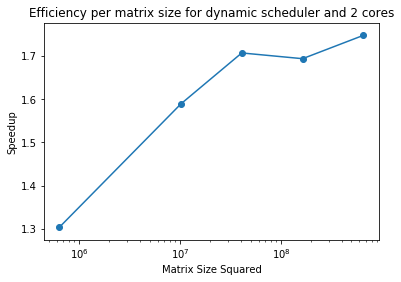

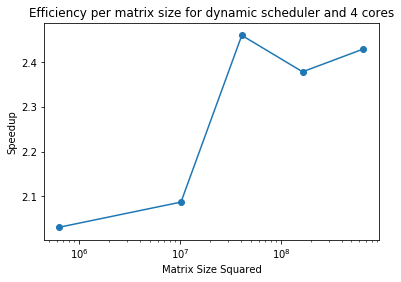

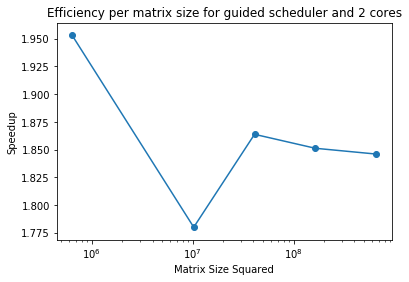

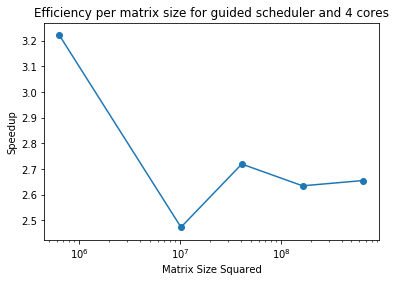

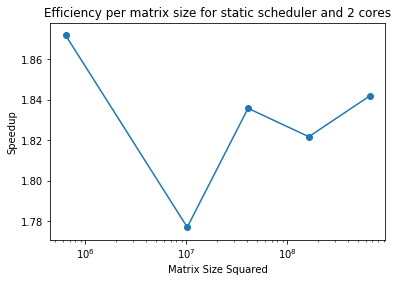

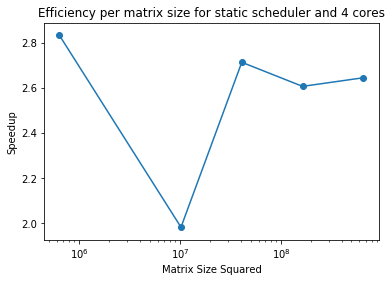

In [157]:
for i in df.sched.unique():
    if sq != 'N/A':
        for j in df.numCores.unique():
            d = df[df['sched'] == i]
            d = d[d['numCores'] == j]
            plt.figure()
            plt.plot(d['matrixSize']**2, d['Speedup'])
            plt.scatter(d['matrixSize']**2, d['Speedup'])
            plt.xlabel('Matrix Size Squared')
            plt.ylabel('Speedup')
            plt.xscale('log')
            plt.title(f'Efficiency per matrix size for {i} scheduler and {j} cores')

Text(0, 0.5, 'Speedup')

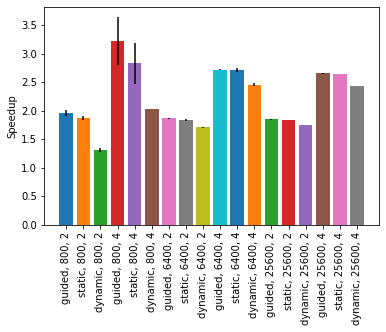

In [156]:
for mat_size in [800, 6400, 25600]:
    for core_count in [2,4]:
        for sched in ['guided', 'static', 'dynamic']:
            a = df.loc[(df['matrixSize']==mat_size) & (df['numCores']== core_count) & (df['sched'] == sched)]
            sp = float(a['Speedup'])
            sp_e = float(a['Speedup_errors'])
            d = plt.bar([f"{sched}, {mat_size}, {core_count}"], [sp], yerr = [sp_e])

plt.xticks(rotation=90)
plt.ylabel('Speedup')

#plt.bar(np.arange(len(df['Speedup'])), df['Speedup'])

In [159]:
df.to_csv('Results.csv')